In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
sim_file = pd.read_csv('deepmd_jax.stdout', comment='#', sep='\\s+', skip_blank_lines=True)
sim_file = sim_file.drop_duplicates(subset=['Step'], ignore_index=True)
print(sim_file.shape)
sim_file.head()

(200001, 8)


,Step,Temperature,KE,PE,Pressure,box_x,Invariant,Time
0,0,280.455,6.960,-30.024,-7030.495,12.383,-23.063,5.314
1,100,283.276,7.030,-30.077,-772.193,12.410,-23.070,15.485
2,200,252.603,6.269,-29.192,7546.021,12.483,-23.066,9.162
3,300,269.529,6.689,-29.231,3419.413,12.586,-23.065,0.104
4,400,281.980,6.998,-28.970,736.354,12.689,-23.063,0.103


In [3]:
step = np.array(sim_file['Step'])
temperature = np.array(sim_file['Temperature'])
pressure = np.array(sim_file['Pressure'])
cell_x = np.array(sim_file['box_x'])

In [4]:
atoms = ase.io.read('traj.xyz', index='0')

types = atoms.get_chemical_symbols()
number_H = types.count('H')
number_O = types.count('O')

totalmass = number_H*1.00784 + number_O*15.9994
DENSITY_UNIT_CONVERSION=1.66054 #Conversion from uma/A³ to g/cm³

density = totalmass/cell_x**3 * DENSITY_UNIT_CONVERSION

The mean density is: 1.013227391393133
The standard deviation of the density is: 0.001130190579078975


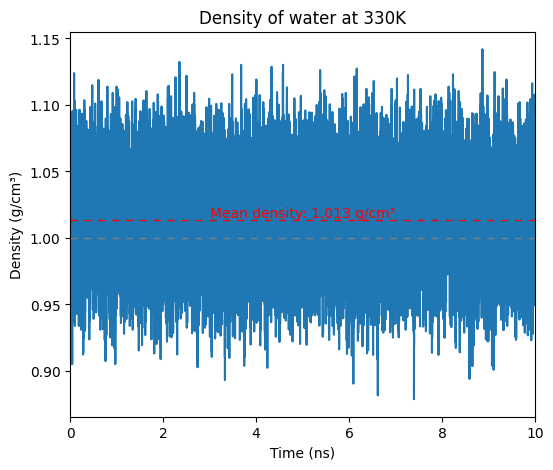

In [5]:
fig, ax = plt.subplots(figsize=(6, 5))

time = 0.5*1e-6*step
ax.plot(time, density)
ax.set_xlabel('Time (ns)')
ax.set_ylabel('Density (g/cm³)')
ax.set_title('Density of water at 330K')
ax.set_xlim(time[0], time[-1])

# Density mean value
mean_density=np.mean(density)
std_density=np.std(density[1:].reshape(10,-1).mean(axis=1))
ax.axhline(mean_density, linestyle=(0,(5,5)), color='Red',linewidth=1)
ax.text((time[-1]-time[0])*0.3, mean_density+.002, f'Mean density: {mean_density:.3f} g/cm³', color='Red')

#Density experimental value
ax.axhline(1.0, linestyle=(0,(5,5)), color='Grey',linewidth=1)

print(f'The mean density is: {mean_density}')
print(f'The standard deviation of the density is: {std_density}')

plt.show()